In [1]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [2]:
# Get the data
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
# Transform categorical column (**continent**) into a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [4]:
anos=data.year.unique()

Traceback (most recent call last):
  File "C:\Users\alexs\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\alexs\anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


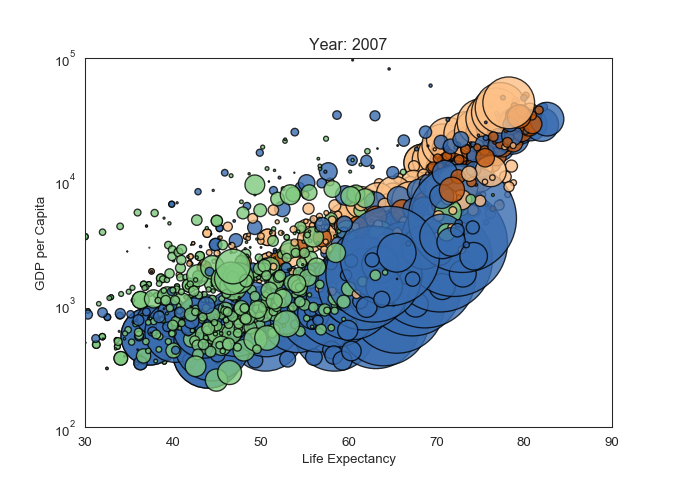

In [17]:
%matplotlib notebook
%matplotlib notebook


#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)


plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.8, edgecolors="black", linewidth=1)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.8, edgecolors="black", linewidth=1)
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=250, blit=False, repeat=False)
    
plt.show()

### <font color = 'blue'>Exercício 1:</font> 
#### Explique a metodologia para criar a animação em cada um dos casos (versões). Comente-as. Justifique.

No primeiro caso, para a versão sem legenda, recorreu-se à metodologia do **Plot Scatter** tendo como variáveis a **Esperança Média de Vida** e **GDP per capita**, e demostrando, com a animação (**Função animate**), o passar dos anos.

A **função animate** vai (com o **data.year.unique()**) buscar os dados dos anos à variável do mesmo nome, definida para ir apresentando todos os anos existentes. Utilizando também a informação de todos os continentes, ao longo destes anos (de 5 em 5), e sobrepondo-a para completar o gráfico.

### <font color = 'blue'>Exercício 2:</font> 
#### Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

As cores apresentadas no gráfico representam os 5 continentes e os seus países (do dataset).

A seguir são apresentados o **Número de continentes** e os **Nomes dos continentes**.

No gráfico, cada cor representa um continente.

In [6]:
Cont_numb = data.continent.unique()
len(Cont_numb)

5

In [7]:
Cont = data.continent.unique()
Cont

[Asia, Europe, Africa, Americas, Oceania]
Categories (5, object): [Asia, Europe, Africa, Americas, Oceania]

### <font color = 'blue'>Exercício 3:</font>
#### Inserir uma legenda ou legendas com a cor das “bolhas” e o seu significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.

<IPython.core.display.Javascript object>


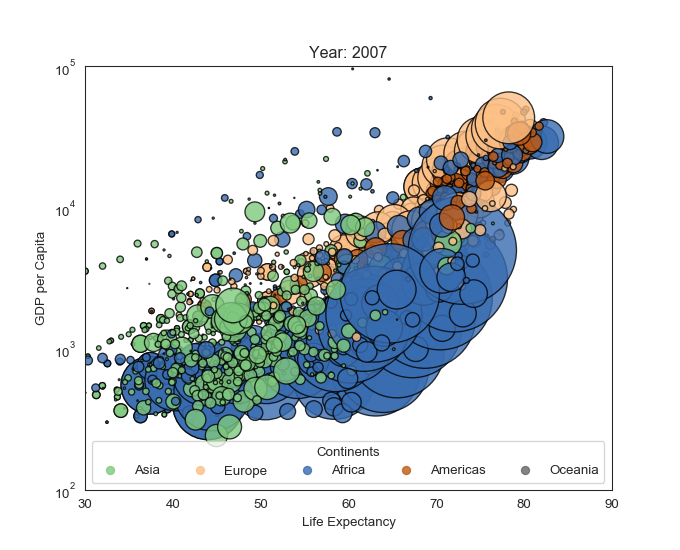

In [16]:
%matplotlib notebook
%matplotlib notebook


#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 550/my_dpi), dpi=my_dpi)

plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.8, edgecolors="black", linewidth=1)
    ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), ncol=5,  title= "Continents")

ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()